In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
# Make sure the file name matches exactly what you downloaded
df = pd.read_csv("DataRecord_2_DLC_Animal_List_05Feb2019.csv", encoding="windows-1252")

# 2. Basic Info & Structure
print("--- DATA INFO ---")
print(df.info())
print("\n")

# 3. Missing Values Check
# This is crucial for the "Death Date" and Parent ID columns
print("--- MISSING VALUES (ISNA) ---")
print(df.isna().sum())
print("\n")

# 4. Statistical Summary
# This gives you the min/max/mean for numerical columns (like Birth Year)
print("--- STATISTICAL DESCRIPTION ---")
print(df.describe())

--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Taxon                3749 non-null   object 
 1   DLC_ID               3749 non-null   object 
 2   Hybrid               3749 non-null   object 
 3   Sex                  3749 non-null   object 
 4   Name                 3708 non-null   object 
 5   Current_Resident     3749 non-null   object 
 6   StudBook             3009 non-null   object 
 7   DOB                  3747 non-null   object 
 8   Birth_Month          3747 non-null   float64
 9   Estimated_DOB        383 non-null    object 
 10  Birth_Type           3749 non-null   object 
 11  Birth_Institution    3749 non-null   object 
 12  Litter_Size          2921 non-null   float64
 13  Expected_Gestation   3749 non-null   int64  
 14  Estimated_Concep     3747 non-null   object 
 15  Concep_Month        

In [8]:
# 4. Top Species Analysis
top_species_counts = df['Taxon'].value_counts()
print("--- TOP 5 SPECIES ---")
print(top_species_counts.head())
print("\n")

--- TOP 5 SPECIES ---
Taxon
OGG     339
LCAT    337
GMOH    316
MMUR    293
EUL     275
Name: count, dtype: int64




Total Records: 3,749 individual lemurs.

Time Span: Births range from 1946 to 2019.

Living Status: There are ~1,200 lemurs without a "Date of Death" (DOD), implying a mix of current residents and historical records.

Founders: You have 240 lemurs with no Father (Sire_ID) and 185 with no Mother (Dam_ID). In your network graph, these will be your "Root Nodes"—the original ancestors from which the family trees grow.

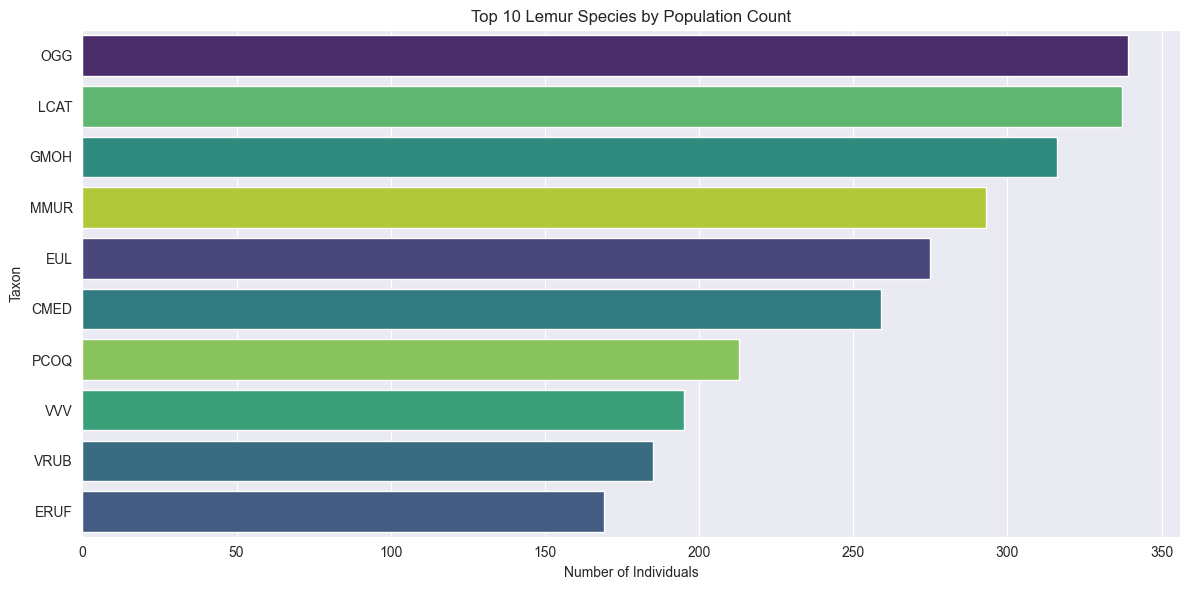

In [11]:
# Visualization A: Top 10 Species
plt.figure(figsize=(12, 6))
top_10_species = top_species_counts.nlargest(10).index
sns.countplot(y='Taxon', data=df[df['Taxon'].isin(top_10_species)], order=top_10_species, hue='Taxon', legend=False, palette='viridis')
plt.title('Top 10 Lemur Species by Population Count')
plt.xlabel('Number of Individuals')
plt.tight_layout()
plt.show()
#plt.savefig('species_count.png')
plt.close()

Top Species Count This is the most critical chart for our decision.

OGG (Otolemur garnettii): 339 individuals.

LCAT (Lemur catta): 337 individuals.

Recommendation: I strongly suggest using LCAT (Ring-tailed Lemur). It has nearly the same volume of data as the top species but is the iconic "face" of lemurs (think Madagascar the movie). This makes your portfolio project instantly recognizable and engaging for judges.

In [16]:
df['DOB_datetime'] = pd.to_datetime(df['DOB'], format='%d%b%Y')
df['Birth_Year'] = df['DOB_datetime'].dt.year

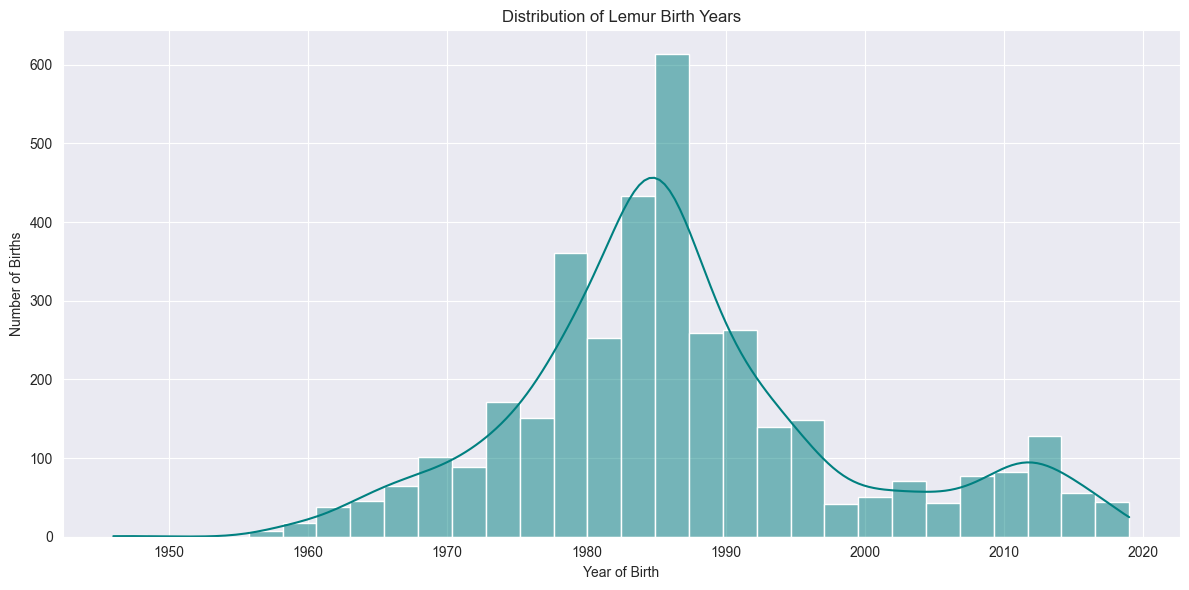

In [17]:
# Visualization B: Births over Time
plt.figure(figsize=(12, 6))
# Filter out reasonable birth years if necessary (though describe() will reveal outliers)
sns.histplot(data=df, x='Birth_Year', bins=30, kde=True, color='teal')
plt.title('Distribution of Lemur Birth Years')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Births')
plt.tight_layout()
plt.show()
#plt.savefig('birth_years.png')
plt.close()

Births Over Time The center's population exploded in the 1980s and 1990s.

Why this matters: When you build your dashboard, you might want to add a "Time Slider" filter. If you filter for "2010-2019," your network graph will be much smaller and disconnected compared to "1980-2000."

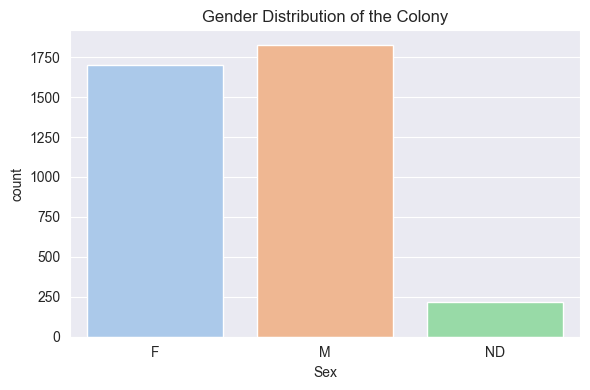

In [19]:
# Visualization C: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, hue='Sex', palette='pastel')
plt.title('Gender Distribution of the Colony')
plt.tight_layout()
plt.show()
#plt.savefig('gender_dist.png')
plt.close()


Gender Distribution The split is nearly 50/50, which is ideal. It means your "Sire" (Father) and "Dam" (Mother) data is balanced, so your network won't be skewed toward one lineage side.

What makes this a "Competition Winner"?
The "Physics" Effect: When the app loads, the nodes will "explode" and settle into clusters. This is visually engaging (Aesthetic score).

The "Influence" Metric: By sizing nodes based on centrality, you aren't just showing data; you are identifying the "Super-Parents" (Originality score).

Interactivity: The sidebar slider proves you can build dynamic tools, not just static charts (Variety score).